<a href="https://colab.research.google.com/github/sv969/MachineLearning_Lab1/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #класс оценок

import seaborn as sns
#import methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os
#print(os.listdir("../input"))

# Read Data

libireis: Pandas, Sklearn

In [ ]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')

# Show Data

In [ ]:
df.head(11)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.columns = ['Label', 'Message']
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Splitting the labels and the data separately

In [ ]:
df_labels = df['Label']
df_labels.head(11)

,Label
0,ham
1,ham
2,spam
3,ham
4,ham
5,spam
6,ham
7,ham
8,spam
9,spam


# Data Visualization
 - To check the most used word in Ham sms and Spam SMS
 - To visualize the percentage of Ham and Spam SMS



				 HAM WORDS


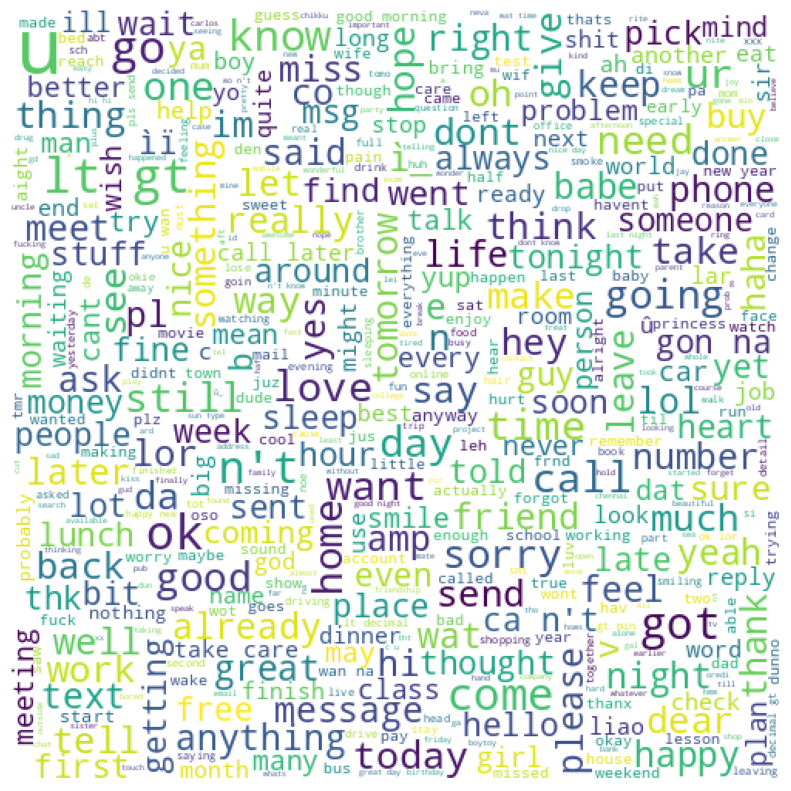

				 SPAM WORDS


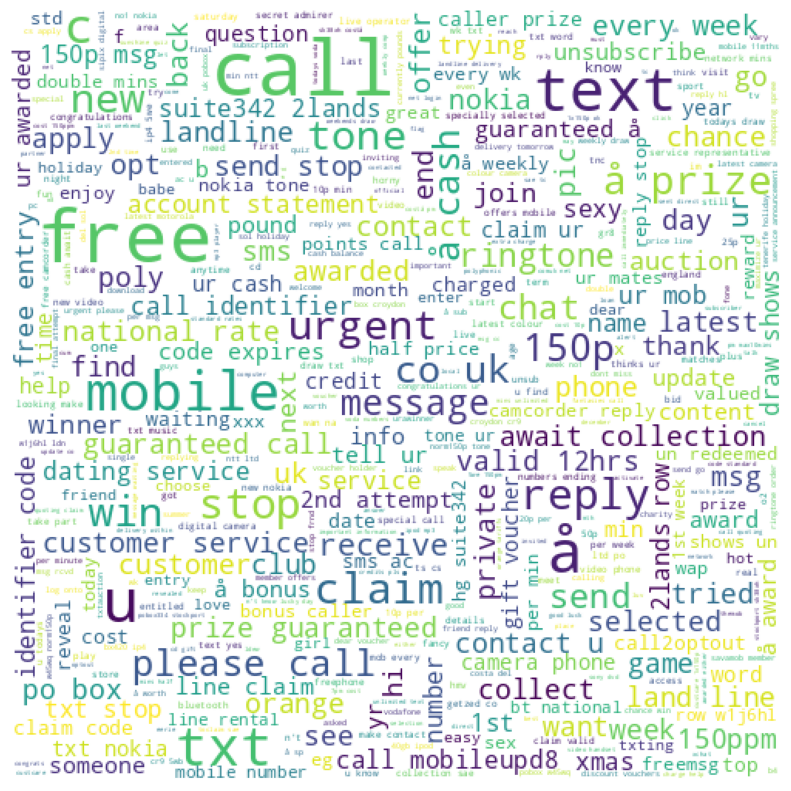

In [ ]:
# Stopwords
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

ham_dataset = df[df.Label == 'ham']
spam_dataset = df[df.Label == 'spam']
ham_words = ' '
spam_words = ' '

for words in ham_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ham_words = ham_words + word + " "
for words in spam_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        spam_words = spam_words + word + " "

def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()

print("\n")
print("\t\t\t\t HAM WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(spam_words)
gen_wordcloud(wordcloud)

## Plotting ham and spam data % in pie chart

<ipython-input-10-ba7f250c9392>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_Class = pd.value_counts(df.Label, sort = True)
<ipython-input-10-ba7f250c9392>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [count_Class[0], count_Class[1]]


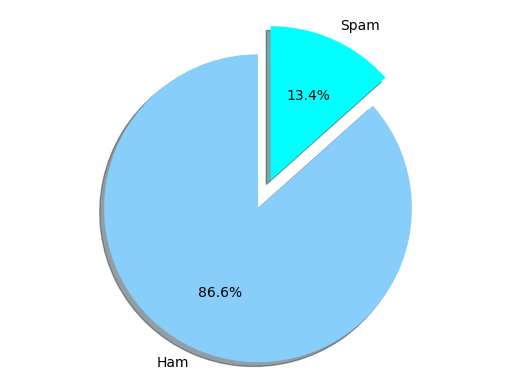

In [ ]:
count_Class = pd.value_counts(df.Label, sort = True)

# Data to Plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

# Splitting the Test and Train Data

In [ ]:
train_set, test_set, train_label, test_label = train_test_split(df, df_labels, test_size = 0.33, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))
#3733*1839

(3733, 2)
(1839, 2)

The Trainset consists of 3733 records and 2 features

The Testset consists of 1839 records and 2 features


# Extracting N-grams from the Text Data

In [ ]:
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.Message)

# preparing for training set
x_train_df = countvect.transform(train_set.Message)

# preparing for test set
x_test_df = countvect.transform(test_set.Message)

In [ ]:
print(train_set)

     Label                                            Message
3235   ham  Aight text me when you're back at mu and I'll ...
945    ham  I cant wait to see you! How were the photos we...
5319   ham                       Kothi print out marandratha.
5528   ham  Its just the effect of irritation. Just ignore it
247    ham                    Kallis wont bat in 2nd innings.
...    ...                                                ...
3772   ham  I came hostel. I m going to sleep. Plz call me...
5191   ham                             Sorry, I'll call later
5226   ham      Prabha..i'm soryda..realy..frm heart i'm sory
5390   ham                         Nt joking seriously i told
860    ham                In work now. Going have in few min.

[3733 rows x 2 columns]


In [ ]:
print(x_train_df)
print(x_train_df.toarray())

  (0, 1314)	1
  (0, 2018)	1
  (0, 2932)	1
  (0, 3204)	1
  (0, 4554)	1
  (0, 7367)	1
  (0, 8836)	1
  (0, 9688)	1
  (0, 14722)	1
  (0, 15715)	1
  (0, 16593)	1
  (0, 17105)	1
  (0, 20724)	1
  (0, 22953)	1
  (0, 23852)	1
  (0, 24191)	1
  (0, 24668)	1
  (0, 26065)	1
  (0, 28713)	1
  (0, 30227)	1
  (1, 5033)	1
  (1, 12031)	1
  (1, 19825)	1
  (1, 21811)	1
  (1, 24858)	1
  :	:
  (3728, 10029)	1
  (3728, 11910)	1
  (3728, 15698)	1
  (3728, 20115)	1
  (3728, 22544)	1
  (3728, 26246)	1
  (3728, 27120)	1
  (3729, 4752)	1
  (3729, 14674)	1
  (3729, 23099)	1
  (3730, 9237)	1
  (3730, 11251)	1
  (3730, 20284)	1
  (3730, 20889)	1
  (3730, 23130)	1
  (3731, 13573)	1
  (3731, 17994)	1
  (3731, 21985)	1
  (3732, 8415)	1
  (3732, 10005)	1
  (3732, 10962)	1
  (3732, 12474)	1
  (3732, 12653)	1
  (3732, 17890)	1
  (3732, 29438)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Data Model

The Algorithms used below in this notebooks are:

 - Naive Bayes
 - K-Nearest
 - Decision Tree
 - Support Vector Machine
 - Random Forest

# K-Nearest Neighbors algorithm


## Sklearn

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of K-Nearest Neighbors algorithm is 89.07014681892332%

 [[1587    0]
 [ 201   51]]


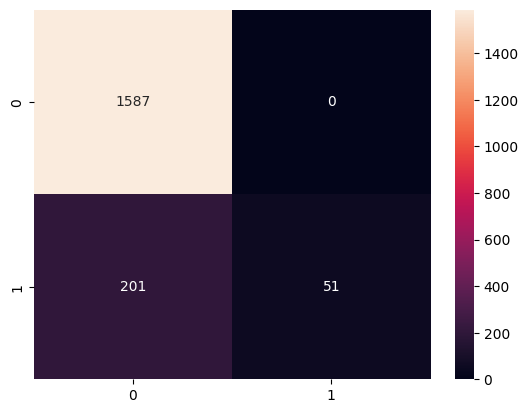

In [ ]:
#KNN = KNeighborsClassifier(metric = 'euclidean')
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.Label)
predictions = dict()
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_set.Label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.Label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
f = sns.heatmap(confusion_matrix_KNN, annot=True, fmt='d')
plt.show()

## Your implementation

In [ ]:
import scipy.spatial
from collections import Counter
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances
from scipy.stats import mode
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.toarray()
        self.y_train = y

    def distance(self, X1, X2):
        #scipy, sklearn
        dist = scipy.spatial.distance.euclidean(X1, X2)
        return dist

    def predict(self, X_test):
        final_output = []#output of the x_test
        for i in range(X_test.shape[0]):
          d = []
          for j in range(self.X_train.shape[0]):
            dist = self.distance(X_test[i], self.X_train[j])
            d.append([dist, j])
          d.sort()
          d = d[:self.k]
          votes = []
          for _dist, _j in d:
            votes.append(self.y_train[_j])
          ans = Counter(votes).most_common(1)[0][0]
          final_output.append(ans)
        return final_output
        pass

    def predict_fast(self, X_test):
      distance = pairwise_distances(X_test, self.X_train, metric = "euclidean")
      indices_to_mask = np.argsort(distance, axis = 1)[:, :self.k]
      knn_labels = self.y_train[indices_to_mask]
      y_pred, _ = mode(knn_labels, axis=1)
      return y_pred.flatten()

    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train_set.Label)
y_train = le.transform(train_set.Label)
y_test = le.transform(test_set.Label)
clf = KNN(5)
clf.fit(x_train_df, y_train)
predicted_values_KNN_my_implementation = clf.predict_fast(x_test_df.toarray())
print(predicted_values_KNN_my_implementation)



[0 0 0 ... 0 0 0]



The accuracy of K-Nearest Neighbors algorithm is 89.17890157694399%

 [[1587    0]
 [ 199   53]]


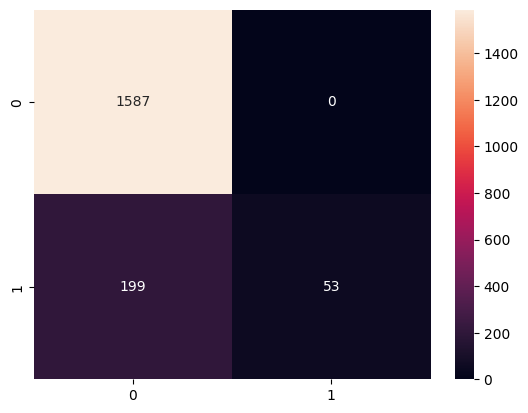

In [ ]:
predictions_my_implementation = dict()
accuracy_KNN_my_implementation = accuracy_score(y_test, predicted_values_KNN_my_implementation)
predictions_my_implementation['K-Nearest Neighbors algorithm'] = accuracy_KNN_my_implementation * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN_my_implementation * 100))
confusion_matrix_KNN_my_implementation = confusion_matrix(y_test, predicted_values_KNN_my_implementation)
print("\n", confusion_matrix_KNN_my_implementation)
f = sns.heatmap(confusion_matrix_KNN_my_implementation, annot=True, fmt='d')
plt.show()

# Naive Bayes classifier

## SKlearn

The accuracy of Naive Bayes clasifier is 97.87928221859707%

 [[1581    6]
 [  33  219]]


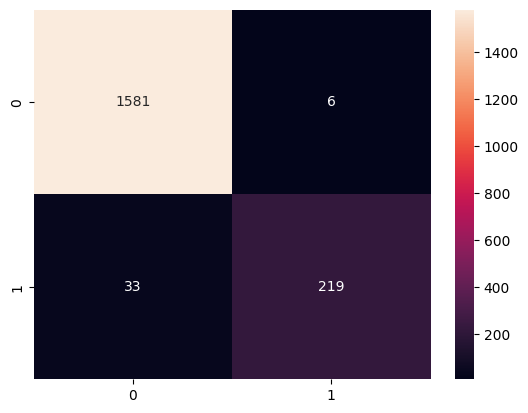

In [ ]:
clf = MultinomialNB()
clf.fit(x_train_df,train_set.Label)
predicted_values_NB = clf.predict(x_test_df)
accuracy = accuracy_score(test_set.Label, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.Label, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
f = sns.heatmap(confusionmatrix, annot=True, fmt='d')
plt.show()

## Your implementation

In [ ]:
class NB:
  def __init__(self):
    pass

  def fit(self, x_train, y_train):
    self.prior = dict()
    #p(x|y)
    self.p_gram= dict()
    pass

  def predict(self, x_test):
    pass


# Logistic regression

## Sklearn

The accuracy of Naive Bayes clasifier is 94.88852637302882%

 [[1586    1]
 [  93  159]]


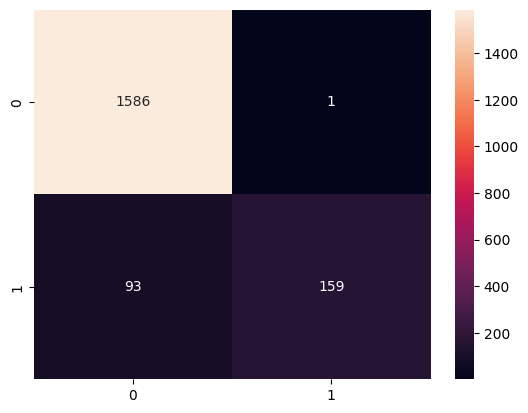

In [ ]:
clf = LogisticRegression()
clf.fit(x_train_df,train_set.Label)
predicted_values_LR = clf.predict(x_test_df)
accuracy_LR = accuracy_score(test_set.Label, predicted_values_LR)
predictions['Logistic regression'] = accuracy_LR * 100
confusionmatrix_LR = confusion_matrix(test_set.Label, predicted_values_LR)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy_LR * 100))
print("\n", confusionmatrix_LR)
f = sns.heatmap(confusionmatrix_LR, annot=True, fmt='d')
plt.show()

## Your implementation

the loss function should be cross entropy loss.

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy

you should calculate the gradient, and use gradient descent to solve the equ.

# Method Comparison

,Algorithms,Percentage
0,K-Nearest Neighbors algorithm,89.070147
1,Naive Bayes,97.879282
2,Logistic regression,94.888526


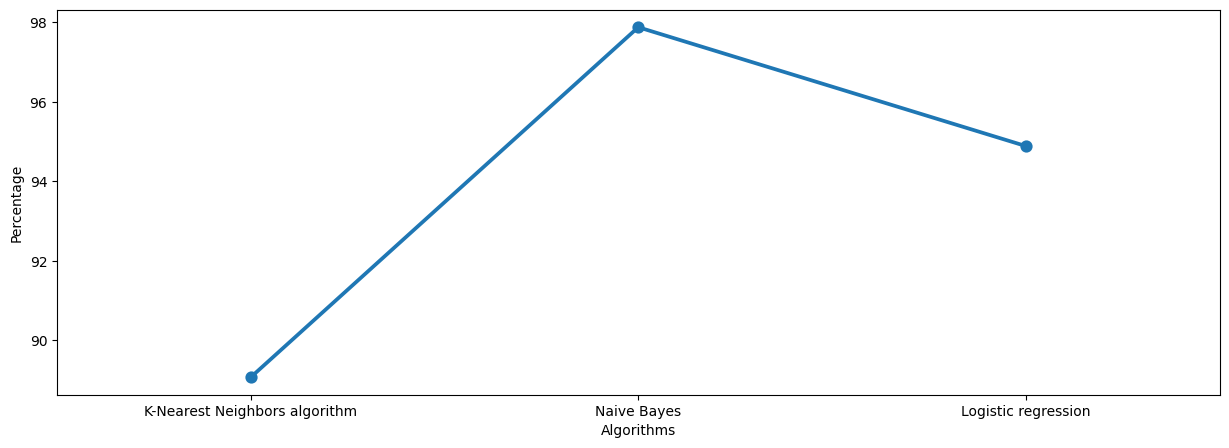

In [ ]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);

# ROC Accuracy

In [ ]:
#pr, tpr, thresholds = roc_curve(testset.v1,predicted_values_XGB, pos_label=2)
test_prediction = test_set.Label.tolist()
predicted_values = predicted_values_NB.tolist()
test_prediction = [1 if pred=="spam" else 0 for pred in test_prediction]
predicted_values = [1 if pred=="spam" else 0 for pred in predicted_values]
fpr, tpr, thresholds = roc_curve(test_prediction,predicted_values)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

The ROC Accuracy is 0.9326334503555676


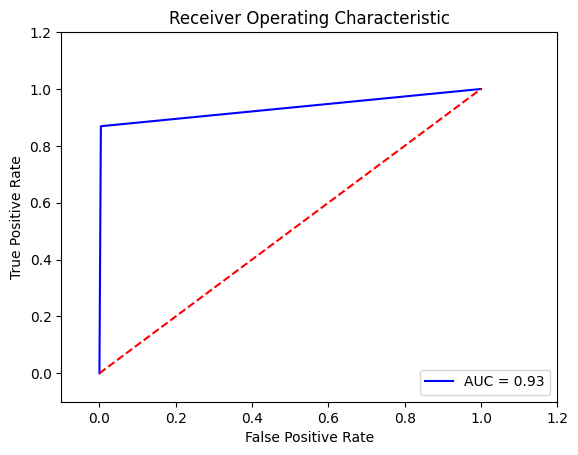

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()